In [19]:
import numpy as np;
import pandas as pd;
import tensorflow as tf;
import matplotlib.pyplot as plt;
import matplotlib.image as mpimg;
import random;
import os;
import pathlib;

In [20]:
data_dir=pathlib.Path("./Original_Images/Original Images/")
class_names=np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['Monkey Pox', 'Others'], dtype='<U10')

In [21]:
def view_random_images(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.axis(False)
    plt.imshow(img)
    plt.title(target_class)
    print(f"the shape of the image is {img.shape}")
    return img

the shape of the image is (224, 224, 3)


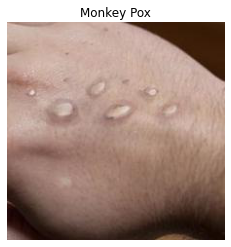

In [22]:
random_image=view_random_images("./Original_Images/Original Images/","Monkey Pox")

the shape of the image is (224, 224, 3)


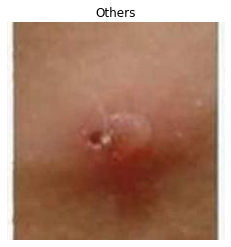

In [23]:
random_image1=view_random_images("./Original_Images/Original Images/","Others")

In [24]:
from keras.preprocessing.image import ImageDataGenerator;
test_datagen=ImageDataGenerator(rescale=1./255)
test_data=test_datagen.flow_from_directory(directory=data_dir,target_size=(224,224),batch_size=32,class_mode="binary",seed=42)

Found 228 images belonging to 2 classes.


In [25]:
test_dir=pathlib.Path("./Augmented Images/Augmented Images")

In [26]:

test_datagen=ImageDataGenerator(rescale=1./255)
data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=32,class_mode="binary")

Found 3192 images belonging to 2 classes.


In [31]:
from keras import layers;
tf.random.set_seed(42)
inputs=layers.Input(shape=(224,224,3))
x=tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu")(inputs)
x=layers.Conv2D(10,3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2,padding="same")(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2,padding="same")(x)
x=layers.Flatten()(x)
x=tf.keras.layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [32]:
model_1.fit(data,epochs=5,validation_data=test_data,verbose=1)

Epoch 1/5
100/100 [==============================] - 6s 57ms/step - loss: 0.6590 - accuracy: 0.6206 - val_loss: 0.5779 - val_accuracy: 0.7193
Epoch 2/5
100/100 [==============================] - 7s 65ms/step - loss: 0.5781 - accuracy: 0.7083 - val_loss: 0.4569 - val_accuracy: 0.8333
Epoch 3/5
100/100 [==============================] - 7s 65ms/step - loss: 0.4941 - accuracy: 0.7644 - val_loss: 0.3269 - val_accuracy: 0.8728
Epoch 4/5
100/100 [==============================] - 6s 58ms/step - loss: 0.5352 - accuracy: 0.7519 - val_loss: 0.3727 - val_accuracy: 0.8640
Epoch 5/5
100/100 [==============================] - 5s 54ms/step - loss: 0.4118 - accuracy: 0.8289 - val_loss: 0.1769 - val_accuracy: 0.9430


In [42]:
def load_and_prep(filename):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[224,224])
    img=img/255.
    return img

In [43]:
def pred_and_plot(model,filename,class_name=class_names):
    img=load_and_prep(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    if len(pred[0])>1:
        pred_class=class_name[tf.argmax(pred[0])]
    else:
        pred_class=class_name[int(tf.round(pred[0]))]
    plt.axis(False)
    plt.title(f"Prediction:{pred_class}")
    plt.imshow(img)

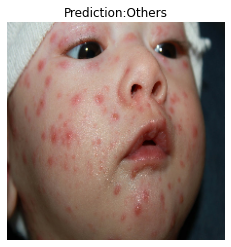

In [44]:
img1=pred_and_plot(model_1,"./chicken_pox_image.jpg")

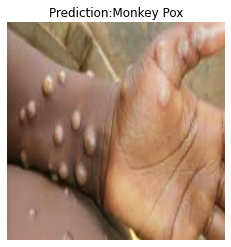

In [45]:
img2=pred_and_plot(model_1,"./image1.jpg")

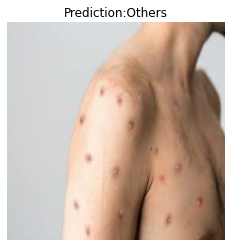

In [46]:
img3=pred_and_plot(model_1,"./image2.jpg")

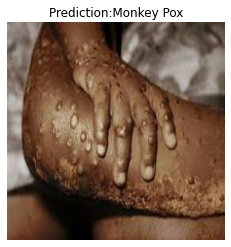

In [48]:
img4=pred_and_plot(model_1,"./images.jpg")

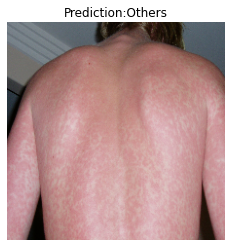

In [49]:
img5=pred_and_plot(model_1,"./rashes.jpg")